<a href="https://colab.research.google.com/github/prabhashkumar11/Diamond_price_prediction/blob/main/Daimond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction Using Regression
- Building a regression model to predict the price of diamonds

In [ ]:
import numpy as np
import pandas as pd


#Importing Libraries

In [ ]:
# all the libraries used in this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#Loading Data

In [ ]:
data=pd.read_csv('diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data Preprocessing
**Data preprocessing**
#### steps involved in Data Preprocessing
- Data cleaning
- Identify and removing outliers
- Encoding categorical variables

In [ ]:
# the first column seems to index , so we will drop it
data= data.drop('Unnamed: 0',axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


min value of x,y,z is 0 which is not possible, so we need to filter it

In [ ]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

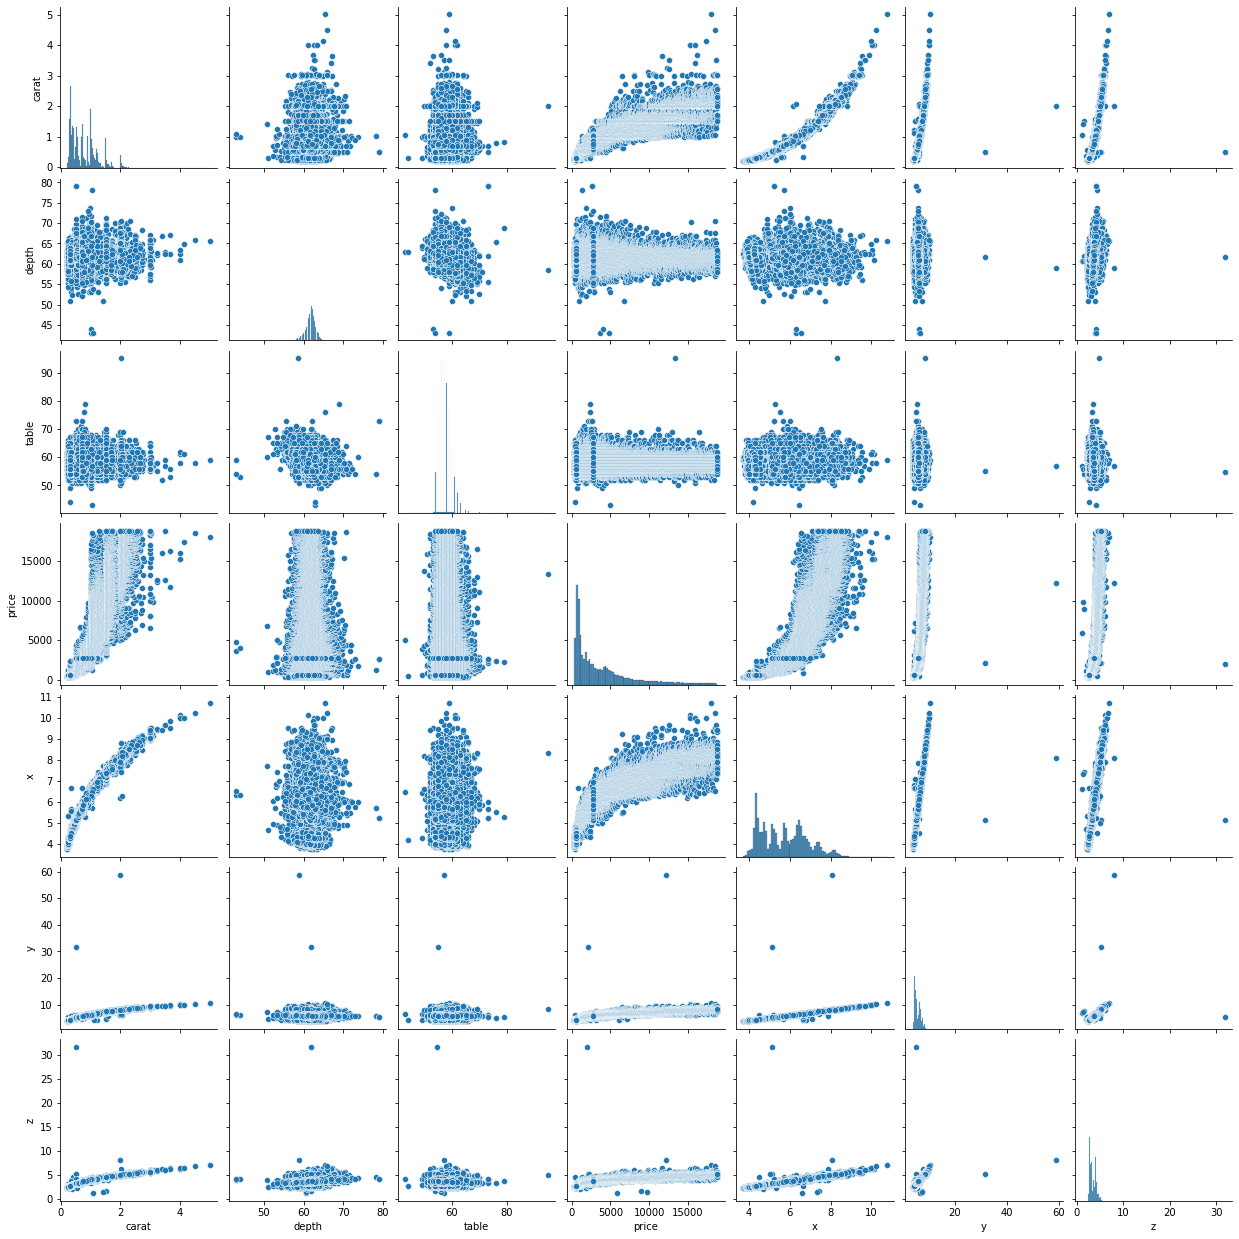

In [ ]:
sns.pairplot(data)

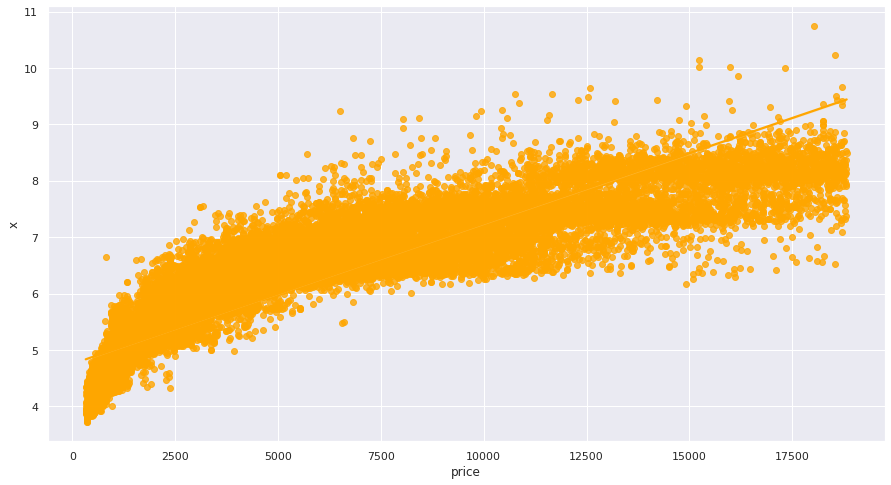

In [ ]:

sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(color_codes=True)
sns.regplot(x='price',y='x',data=data,color="#ffa600")


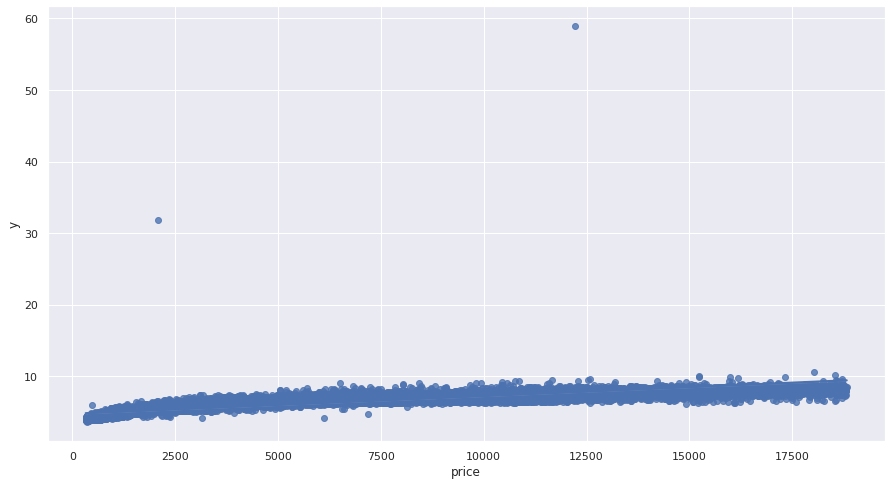

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(color_codes=True)
sns.regplot(x='price',y='y',data=data)

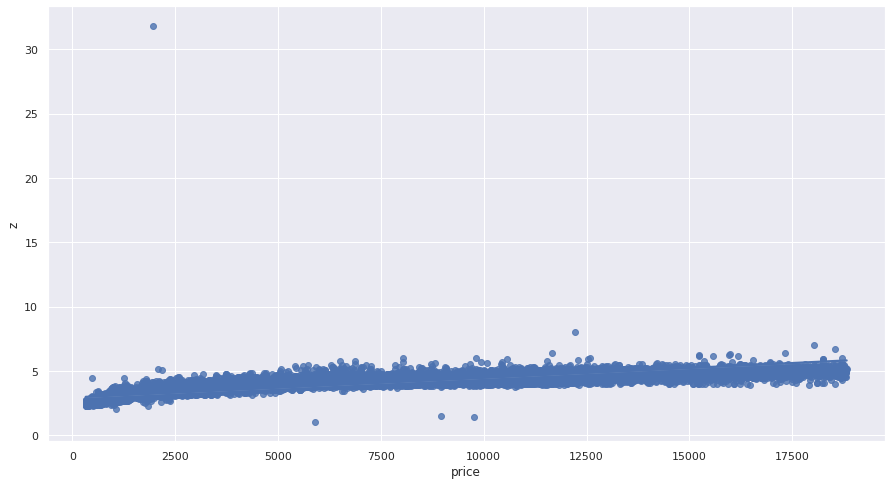

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(color_codes=True)
sns.regplot(x='price',y='z',data=data)

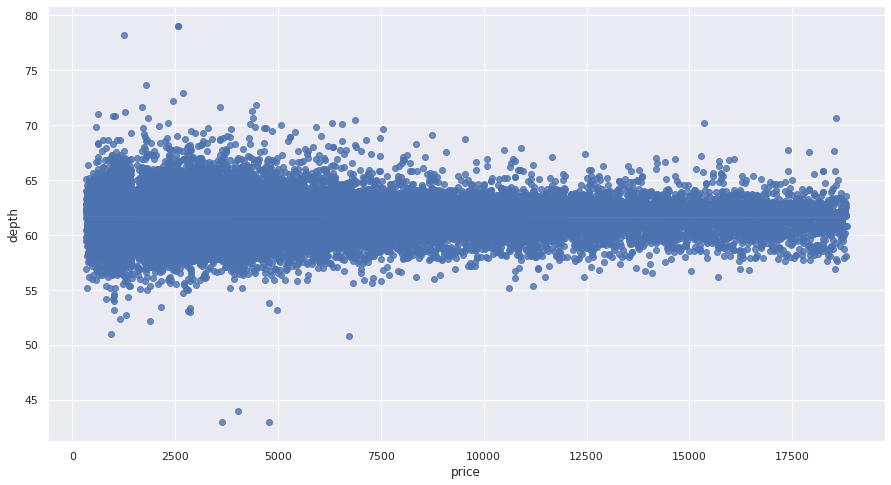

In [ ]:
sns.set_style('dark')
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(color_codes=True)
sns.regplot(x='price',y='depth',data=data)

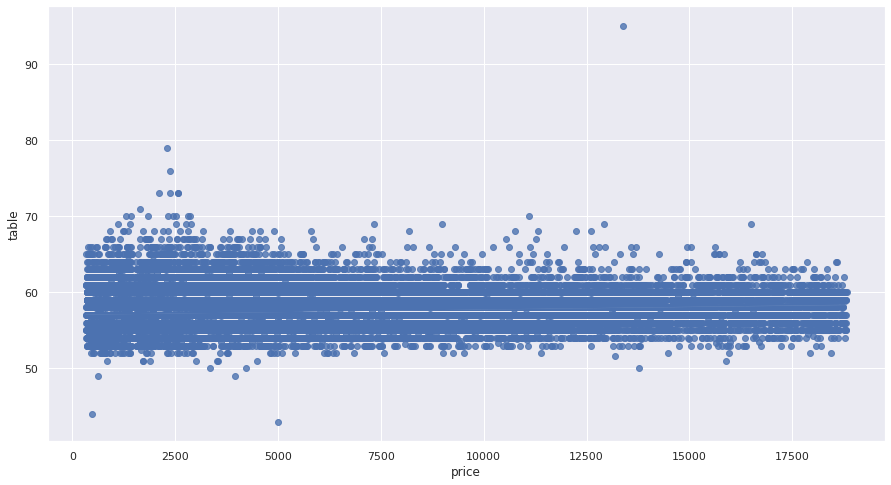

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(color_codes=True)
sns.regplot(x='price',y='table',data=data)

we can clearly see the outliers in this attribute, next up we will remove the data points

In [ ]:
#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

Dealing with categorical varaibles

In [ ]:
obj_cols=data.select_dtypes(include=['object']).columns.tolist()

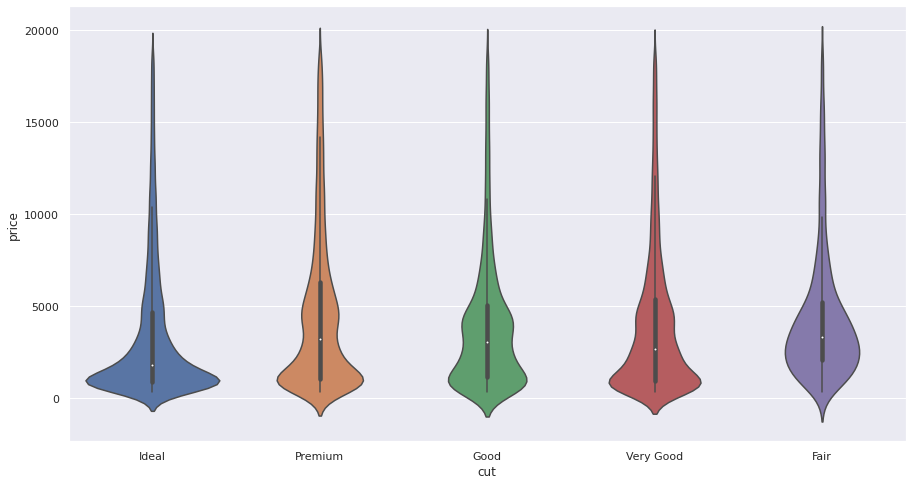

In [ ]:
#violinplot 
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(color_codes=True)
sns.violinplot(x='cut',y='price',data=data)

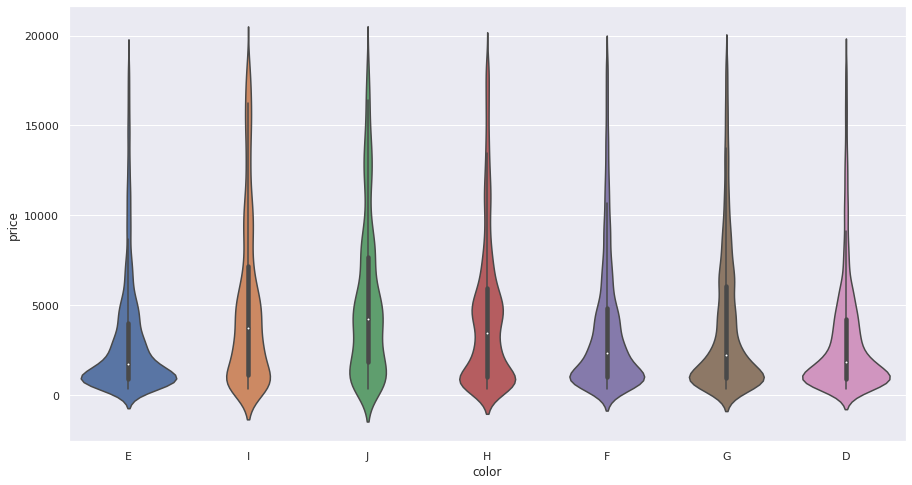

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(color_codes=True)
sns.violinplot(x='color',y='price',data=data)

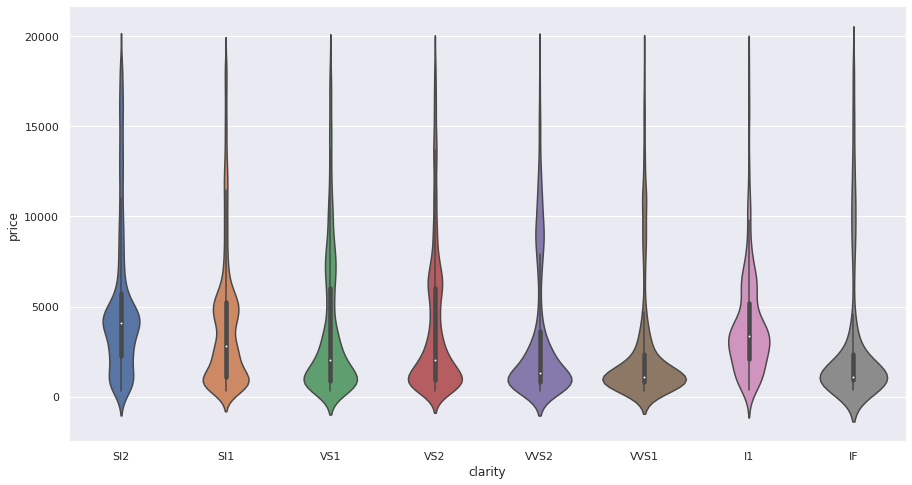

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(color_codes=True)
sns.violinplot(x='clarity',y='price',data=data)

In [ ]:
label_data=data.copy()

#apply label encoder to eachcolumn with categorical data
label_encoder=LabelEncoder()

for col in obj_cols:
   label_data[col]=label_encoder.fit_transform(label_data[col])

label_data.head()   





,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


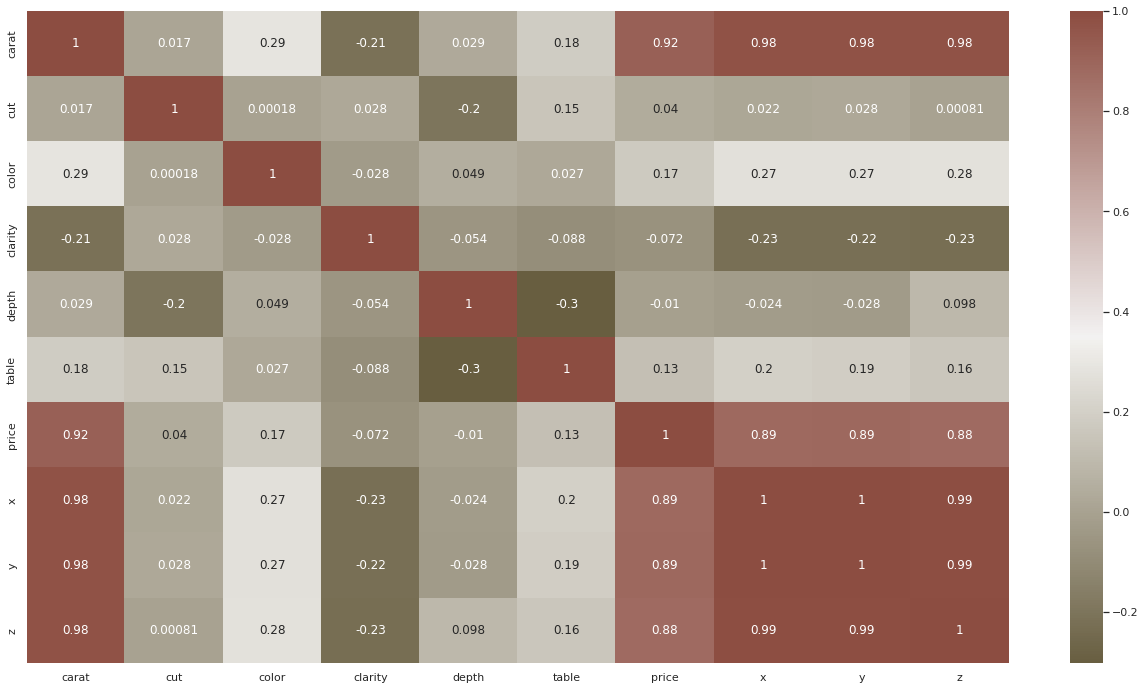

In [ ]:
#correlation matrix
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(22,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**points to notice**
- 'x','y','z' shwo high correlation to the target column
- 'depth', 'cut' , 'table' show low correlation. we should consider dropping but let's keep it

#Model Buliding

**MODEL BUILDING**




Model Building
###Steps involved in Model Building

- Setting up features and target
- Build a pipeline of standard scalar and model for five different regressors.
- Fit all the models on training data
- Get mean of cross-validation on the training set for all the models for  negative root mean square error
- Pick the model with the best cross-validation score
- Fit the best model on the training set and get

In [ ]:
X=label_data.drop('price',axis=1)
y=label_data['price']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=7)

In [ ]:
le=LinearRegression()
le.fit(X_train,y_train)


LinearRegression()

In [ ]:
pred=le.predict(X_test)

In [ ]:
metrics.r2_score(y_test,pred)

0.8890105065854332

In [ ]:
#Building pipelines of standard scaler and model for various regressors

pipeline_lr=Pipeline(steps=[('scalar1',StandardScaler()),('lr_reg',LinearRegression())])

pipeline_dt=Pipeline(steps=[('scalar2',StandardScaler()),('dt_reg',DecisionTreeRegressor())])

pipeline_rf=Pipeline(steps=[('scalar3',StandardScaler()),('rf_reg',RandomForestRegressor())])

pipeline=[pipeline_lr,pipeline_dt,pipeline_rf]


#fit the pipeline

for pipe in pipeline:
  pipe.fit(X_train,y_train)
  preds = pipe.predict(X_test)
  
  score = metrics.mean_absolute_error(y_test, preds)
  print('MAE:', score)


MAE: 849.3507396470709
MAE: 359.79850857015657
MAE: 270.5914553424942


In [ ]:
# Preprocessing of validation data, get predictions
preds = pipeline.predict(X_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('MAE:', score)